In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import os

##### LOAD MANIFEST

,filePath,year,site,night.mmdd,hhmm,hour_of_night,fileName,dateTime_excel,fSize.Mb,xResolution,...,filePath.orig,fileName.orig,fileName_second,avg_red,avg_green,avg_blue,PC1,PC2,night.mmddyyyy,time
0,2022/2022_WS1_0611_0000_WSCT4655.JPG,2022,WS1,611,0,2.0,2022_WS1_0611_0000_WSCT4655.JPG,2022-06-12 0:00:02,1.33,6080,...,./2022/2105.WS1/06122022/WSCT4655.JPG,WSCT4655.JPG,2022_WS1_0611_0_WSCT4655.JPG,0.516,0.622,0.735,-0.821,0.684,6112022,0:00:02
1,2022/2022_WS1_0611_0010_WSCT4657.JPG,2022,WS1,611,10,2.2,2022_WS1_0611_0010_WSCT4657.JPG,2022-06-12 0:10:02,1.32,6080,...,./2022/2105.WS1/06122022/WSCT4657.JPG,WSCT4657.JPG,2022_WS1_0611_10_WSCT4657.JPG,0.529,0.634,0.746,-0.607,0.634,6112022,0:10:02
2,2022/2022_WS1_0611_0100_WSCT4667.JPG,2022,WS1,611,100,3.0,2022_WS1_0611_0100_WSCT4667.JPG,2022-06-12 1:00:02,1.31,6080,...,./2022/2105.WS1/06122022/WSCT4667.JPG,WSCT4667.JPG,2022_WS1_0611_100_WSCT4667.JPG,0.543,0.651,0.763,-0.325,0.552,6112022,1:00:02
3,2022/2022_WS1_0611_0105_WSCT4668.JPG,2022,WS1,611,105,3.1,2022_WS1_0611_0105_WSCT4668.JPG,2022-06-12 1:05:02,1.30,6080,...,./2022/2105.WS1/06122022/WSCT4668.JPG,WSCT4668.JPG,2022_WS1_0611_105_WSCT4668.JPG,0.551,0.658,0.769,-0.203,0.536,6112022,1:05:02
4,2022/2022_WS1_0611_0110_WSCT4669.JPG,2022,WS1,611,110,3.2,2022_WS1_0611_0110_WSCT4669.JPG,2022-06-12 1:10:02,1.30,6080,...,./2022/2105.WS1/06122022/WSCT4669.JPG,WSCT4669.JPG,2022_WS1_0611_110_WSCT4669.JPG,0.550,0.658,0.769,-0.202,0.524,6112022,1:10:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,2024/2024_WS6up_1101_0400_WSCT1115.JPG,2024,WS6up,1101,400,6.0,2024_WS6up_1101_0400_WSCT1115.JPG,2024-11-02 4:00:02,1.59,6080,...,./2024/WS6up/101_WSCT/WSCT1115.JPG,WSCT1115.JPG,2024_WS6up_1101_400_WSCT1115.JPG,0.693,0.783,0.854,1.845,0.450,11012024,4:00:02
11697,2024/2024_WS6up_1101_0045_WSCT1076.JPG,2024,WS6up,1101,45,2.8,2024_WS6up_1101_0045_WSCT1076.JPG,2024-11-02 0:45:08,1.40,6080,...,./2024/WS6up/101_WSCT/WSCT1076.JPG,WSCT1076.JPG,2024_WS6up_1101_45_WSCT1076.JPG,0.686,0.785,0.859,1.847,0.372,11012024,0:45:08
11698,2024/2024_WS6up_1101_0005_WSCT1068.JPG,2024,WS6up,1101,5,2.1,2024_WS6up_1101_0005_WSCT1068.JPG,2024-11-02 0:05:10,1.42,6080,...,./2024/WS6up/101_WSCT/WSCT1068.JPG,WSCT1068.JPG,2024_WS6up_1101_5_WSCT1068.JPG,0.693,0.788,0.860,1.904,0.394,11012024,0:05:10
11699,2024/2024_WS6up_1101_0050_WSCT1077.JPG,2024,WS6up,1101,50,2.8,2024_WS6up_1101_0050_WSCT1077.JPG,2024-11-02 0:50:10,1.39,6080,...,./2024/WS6up/101_WSCT/WSCT1077.JPG,WSCT1077.JPG,2024_WS6up_1101_50_WSCT1077.JPG,0.685,0.784,0.858,1.834,0.373,11012024,0:50:10


ACCORING TO THE MANIFEST
SITES DATA WAS RECORDED FOR:  {'WS6up', 'WS1', 'WS4', 'WS5', 'WS6low'}
NUMBER OF NIGHTS DATA WAS RECORDED FOR: 45
THEY ARE:  ['10032024', '10112024', '10192024', '11012024', '6072024', '6112022', '6112023', '6152024', '6182022', '6202023', '6252022', '6282023', '6282024', '7032022', '7052023', '7062022', '7062024', '7102022', '7112022', '7122023', '7132024', '7172022', '7192024', '7202023', '7242023', '7252022', '7262024', '8022023', '8022024', '8072024', '8162023', '8162024', '8172022', '8192023', '8242024', '8292024', '8312022', '9042023', '9072024', '9092023', '9102022', '9132024', '9192024', '9232023', '9302023']


<Axes: title={'center': 'Count of Pictures Per Night'}, xlabel='night.mmddyyyy'>

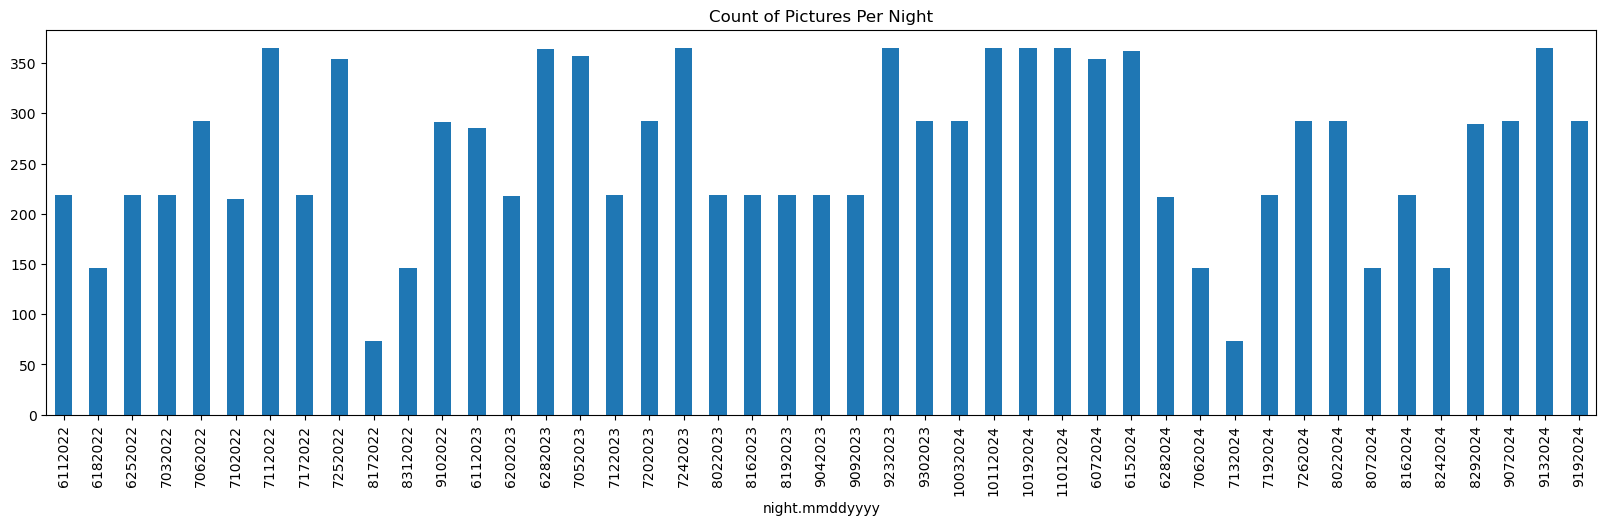

In [2]:
# manifestnew

manifest_new = pd.read_csv("trimmed manifesto - Sheet1.csv")
manifest_new["night.mmddyyyy"] = (manifest_new["night.mmdd"]).astype(str) + manifest_new["year"].astype(str)
manifest_new["time"] = manifest_new["dateTime_excel"].apply(lambda x: x.split(" ")[1])
display(manifest_new)

# analysis on manifest

print("ACCORING TO THE MANIFEST")

# DIFFERENT SITES IN MANIFEST
print("SITES DATA WAS RECORDED FOR: ", set(manifest_new.site))

# Num of nights
nights = set(manifest_new["night.mmddyyyy"])
print("NUMBER OF NIGHTS DATA WAS RECORDED FOR:", len(nights))

# DIFFERENT NIGHTS
print("THEY ARE: ", sorted(nights))

pic_per_night =  manifest_new["night.mmddyyyy"].value_counts()
pic_per_night = pic_per_night.sort_index(
    key=lambda s: s.astype(str).str[-4:] +  s.astype(str).str[-7:] + s.astype(str).str[-6:-4] 
)
# print(pic_per_night)

# Histogram for pictures per night while almost equal

pic_per_night.plot(kind = "bar",figsize=(20, 5), title="Count of Pictures Per Night")

##### Function for the smaller manifest (by site and year)

In [ ]:
# manifest by year and site
def manifest_by_siteyear(site, year, manifestdf):
    output = manifestdf[(manifestdf["year"]==year)& (manifestdf["site"]==site)]
    return(output) 

# get file:filepath mapping from the manifest
def get_file_path_mapping(manifestdf):
    return dict(zip(manifestdf['fileName.orig'], manifestdf['filePath']))

# get photo-night lookup

def get_file_night_lookup(manifestdf):
    return manifestdf.set_index("fileName.orig")["night.mmddyyyy"].to_dict()

# get time and hour mapping
def get_time_hour_mapping(manifestdf):
    return dict(zip(manifestdf['time'], manifestdf['hour_of_night']))
# time and hhmm mapping
def get_time_hhmm_mapping(manifestdf):
    return dict(zip(manifest_ws1_23["time"],manifest_ws1_23["hhmm"]))
# filepath and time mapping
def get_filepath_times_mapping(manifestdf):
    return dict(zip(manifestdf["filePath"],manifestdf["time"]))


In [18]:
# extract the manifest
manifest_ws1_23 = manifest_by_siteyear("WS1", 2023, manifest_new)
display(manifest_ws1_23.head(5))

# get all files from the smaller manifest
file_filepath = get_file_path_mapping(manifest_ws1_23)
print(len(file_filepath))

# photonight lookup
photonight_lookup = get_file_night_lookup(manifest_ws1_23)
print(len(photonight_lookup))

#timehourlookup
time_hour = get_time_hour_mapping(manifest_ws1_23)
print(len(time_hour))

#timehhmm lookup
time_hhmm = get_time_hhmm_mapping(manifest_ws1_23)
print(len(time_hhmm))

#filepath ann time mapping
manifest_times = get_filepath_times_mapping(manifest_ws1_23)
print(len(manifest_times))

,filePath,year,site,night.mmdd,hhmm,hour_of_night,fileName,dateTime_excel,fSize.Mb,xResolution,...,filePath.orig,fileName.orig,fileName_second,avg_red,avg_green,avg_blue,PC1,PC2,night.mmddyyyy,time
2758,2023/2023_WS1_0611_0000_WSCT3021.JPG,2023,WS1,611,0,2.0,2023_WS1_0611_0000_WSCT3021.JPG,2023-06-12 0:00:02,1.87,6080,...,./2023/WS1/101_WSCT/WSCT3021.JPG,WSCT3021.JPG,2023_WS1_0611_0_WSCT3021.JPG,0.569,0.711,0.852,0.748,-0.185,6112023,0:00:02
2759,2023/2023_WS1_0611_0010_WSCT3023.JPG,2023,WS1,611,10,2.2,2023_WS1_0611_0010_WSCT3023.JPG,2023-06-12 0:10:02,1.82,6080,...,./2023/WS1/101_WSCT/WSCT3023.JPG,WSCT3023.JPG,2023_WS1_0611_10_WSCT3023.JPG,0.531,0.669,0.820,0.096,-0.085,6112023,0:10:02
2760,2023/2023_WS1_0611_0100_WSCT3033.JPG,2023,WS1,611,100,3.0,2023_WS1_0611_0100_WSCT3033.JPG,2023-06-12 1:00:02,1.85,6080,...,./2023/WS1/101_WSCT/WSCT3033.JPG,WSCT3033.JPG,2023_WS1_0611_100_WSCT3033.JPG,0.547,0.693,0.841,0.452,-0.196,6112023,1:00:02
2761,2023/2023_WS1_0611_0105_WSCT3034.JPG,2023,WS1,611,105,3.1,2023_WS1_0611_0105_WSCT3034.JPG,2023-06-12 1:05:02,1.83,6080,...,./2023/WS1/101_WSCT/WSCT3034.JPG,WSCT3034.JPG,2023_WS1_0611_105_WSCT3034.JPG,0.582,0.714,0.798,0.481,0.471,6112023,1:05:02
2762,2023/2023_WS1_0611_0110_WSCT3035.JPG,2023,WS1,611,110,3.2,2023_WS1_0611_0110_WSCT3035.JPG,2023-06-12 1:10:02,1.85,6080,...,./2023/WS1/101_WSCT/WSCT3035.JPG,WSCT3035.JPG,2023_WS1_0611_110_WSCT3035.JPG,0.528,0.668,0.816,0.045,-0.065,6112023,1:10:02


1014
1014
231
231
1014


#### LOAD PREDICTIONS

In [19]:
## Reading predictions from WS1
## add size of moths

ws1pred_df = pd.read_csv("ws1_moth_individual_annotation_details - ws1_moth_individual_annotation_details.csv")
ws1pred_df["size_in_cm"] = ws1pred_df["diff_x_in_cm"] * ws1pred_df["diff_y_in_cm"]
ws1pred_df["fileName.orig"] = ws1pred_df["Photo_Name"].apply(lambda x : x.split("_")[1] + ".JPG")
display(ws1pred_df.head(5))

,Date,Time,Station,Photo_Name,X_Min,Y_Min,X_Max,Y_Max,Confidence,diff_x,diff_y,diff_x_in_cm,diff_y_in_cm,size_in_cm,fileName.orig
0,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,1954.785278,1143.405029,2220.389160,1328.970459,0.660315,265.603882,185.565430,3.625842,2.387391,8.656305,WSCT3313.JPG
1,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2299.779053,927.744507,2438.214355,1021.005615,0.629679,138.435303,93.261108,1.889824,1.199851,2.267506,WSCT3313.JPG
2,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2114.031738,2873.118164,2299.340088,3021.338867,0.613280,185.308350,148.220703,2.529703,1.906933,4.823974,WSCT3313.JPG
3,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,5520.077637,750.872803,5735.361816,895.647522,0.611173,215.284180,144.774719,2.938912,1.862599,5.474014,WSCT3313.JPG
4,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2400.743652,173.510818,2516.101074,264.109894,0.588316,115.357422,90.599075,1.574781,1.165602,1.835568,WSCT3313.JPG


##### COMPARING MANIFEST AND PREDICTIONS

In [20]:
# find the mismatch files between manifest and predictions

print("No. of photos in 2023 in predictions: ", len(set(ws1pred_df["fileName.orig"])))
print("No. of photos in 2023 in Manifest: ",len(file_filepath))
# print("No. of photos in 2023 in Manifest: ", len(set(manifest_ws1_23["fileName.orig"])) )

count = 0
bad_files23 = []
for x in set(ws1pred_df["fileName.orig"]):
    if x in file_filepath:
        count+=1
    else:
        bad_files23.append(x)

print(count) 
print(len(bad_files23))

No. of photos in 2023 in predictions:  1331
No. of photos in 2023 in Manifest:  1014
1014
317


In [24]:
# drop files not in manifest i.e. bad files
ws1pred_df = ws1pred_df[~ws1pred_df["fileName.orig"].isin(bad_files23)].copy()
print("No. of Images in 2023 in predictions: ", len(set(ws1pred_df["fileName.orig"])))

# add filepath from manifest
ws1pred_df["filePath"] = ws1pred_df["fileName.orig"].map(file_filepath)
# add night
ws1pred_df["night"] = ws1pred_df["fileName.orig"].map(photonight_lookup)
ws1pred_df["year"] = 2023
ws1pred_df["time_manifest"] = ws1pred_df["filePath"].apply(lambda x: manifest_times[x])
ws1pred_df["hhmm"] = ws1pred_df["time_manifest"].apply(lambda x: time_hhmm[x])
ws1pred_df["hour"] = ws1pred_df["time_manifest"].apply(lambda x: time_hour[x])

ws1pred_df = ws1pred_df.dropna()

print("Nights in 2023 in predictions: ", len(set(ws1pred_df["night"])))
print("Nights in 2023 in Manifest: ", len(set(manifest_ws1_23["night.mmddyyyy"])))
print("No. of images in predictions: ", len(set(ws1pred_df["filePath"])))
display(ws1pred_df)

No. of Images in 2023 in predictions:  1014
Nights in 2023 in predictions:  14
Nights in 2023 in Manifest:  14
No. of images in predictions:  1014


,Date,Time,Station,Photo_Name,X_Min,Y_Min,X_Max,Y_Max,Confidence,diff_x,...,diff_x_in_cm,diff_y_in_cm,size_in_cm,fileName.orig,filePath,night,year,time_manifest,hhmm,hour
0,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,1954.785278,1143.405029,2220.389160,1328.970459,0.660315,265.603882,...,3.625842,2.387391,8.656305,WSCT3313.JPG,2023/2023_WS1_0705_0045_WSCT3313.JPG,7052023,2023,0:45:02,45,2.8
1,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2299.779053,927.744507,2438.214355,1021.005615,0.629679,138.435303,...,1.889824,1.199851,2.267506,WSCT3313.JPG,2023/2023_WS1_0705_0045_WSCT3313.JPG,7052023,2023,0:45:02,45,2.8
2,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2114.031738,2873.118164,2299.340088,3021.338867,0.613280,185.308350,...,2.529703,1.906933,4.823974,WSCT3313.JPG,2023/2023_WS1_0705_0045_WSCT3313.JPG,7052023,2023,0:45:02,45,2.8
3,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,5520.077637,750.872803,5735.361816,895.647522,0.611173,215.284180,...,2.938912,1.862599,5.474014,WSCT3313.JPG,2023/2023_WS1_0705_0045_WSCT3313.JPG,7052023,2023,0:45:02,45,2.8
4,2023-07-06,0:45:01,WS1,WS1_WSCT3313_20230706_004501.jpg,2400.743652,173.510818,2516.101074,264.109894,0.588316,115.357422,...,1.574781,1.165602,1.835568,WSCT3313.JPG,2023/2023_WS1_0705_0045_WSCT3313.JPG,7052023,2023,0:45:02,45,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43186,2023-07-06,1:50:07,WS1,WS1_WSCT3326_20230706_015007.jpg,1167.333496,836.156677,1289.335083,943.919128,0.326753,122.001587,...,1.665482,1.386418,2.309054,WSCT3326.JPG,2023/2023_WS1_0705_0150_WSCT3326.JPG,7052023,2023,1:50:10,150,3.8
43187,2023-07-06,1:50:07,WS1,WS1_WSCT3326_20230706_015007.jpg,1300.764160,1920.950562,1402.666260,2005.641724,0.310723,101.902100,...,1.391098,1.089594,1.515732,WSCT3326.JPG,2023/2023_WS1_0705_0150_WSCT3326.JPG,7052023,2023,1:50:10,150,3.8
43188,2023-07-06,1:50:07,WS1,WS1_WSCT3326_20230706_015007.jpg,4117.700195,3113.387207,4285.541016,3204.997559,0.308601,167.840820,...,2.291248,1.178613,2.700494,WSCT3326.JPG,2023/2023_WS1_0705_0150_WSCT3326.JPG,7052023,2023,1:50:10,150,3.8
43189,2023-07-06,1:50:07,WS1,WS1_WSCT3326_20230706_015007.jpg,2305.314453,952.734802,2372.833252,1008.067749,0.236977,67.518799,...,0.921720,0.711886,0.656160,WSCT3326.JPG,2023/2023_WS1_0705_0150_WSCT3326.JPG,7052023,2023,1:50:10,150,3.8


#### sanity checks are done
Steps so far
1. get manifest for WS1 and 2023
2. get predictions
3. add x diff, y diff and size in unit cm.
4. add night_mmddyyyy to preictions
5. sanity checks:
    1. all files in predictions are also in the manifest
    2. number of nights in predictions = number of nights in manifest.

#### can proceed with just ws1predictions after all of the above

In [26]:
# add log2 and log10 scale to the sizes
ws1pred_df["log10(size)"] = np.log10(ws1pred_df["size_in_cm"])
ws1pred_df["log2(size)"] = np.log2(ws1pred_df["size_in_cm"])

# lets add time bins too for scatter plot visualisation and variation with time
ws1pred_df["timebin"] = ws1pred_df["Time"].apply(lambda x: x.split(":")[0])

# give new order for the columns
new_order =  ["filePath",'night',"log2(size)",'size_in_cm','hour',"hhmm","timebin",'Date', 'time_manifest', 'Station', 'Photo_Name', 'X_Min', 'Y_Min', 'X_Max',
       'Y_Max', 'Confidence', "log10(size)", 'diff_x', 'diff_y', 'diff_x_in_cm', 'diff_y_in_cm', "Time", 'fileName.orig']
ws1pred_df = ws1pred_df[new_order]

# sort rows by the nights

ws1pred_df = ws1pred_df.sort_values(
    by='night',
    key=lambda s: s.astype(str).str[-4:] + s.astype(str).str[-7:-4] + s.astype(str).str[-6:-4]
)

display(ws1pred_df.head(10))
print(len(ws1pred_df))

# Details of the attained predictions
(ws1pred_df.describe())

,filePath,night,log2(size),size_in_cm,hour,hhmm,timebin,Date,time_manifest,Station,...,X_Max,Y_Max,Confidence,log10(size),diff_x,diff_y,diff_x_in_cm,diff_y_in_cm,Time,fileName.orig
25892,2023/2023_WS1_0611_2245_WSCT3006.JPG,6112023,0.509155,1.423216,0.8,2245,22,2023-06-11,22:45:02,WS1,...,2375.461426,2022.009521,0.499681,0.153271,91.807373,88.265747,1.253291,1.135583,22:45:01,WSCT3006.JPG
29549,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.469472,5.538411,4.5,230,2,2023-06-12,2:30:02,WS1,...,2834.101563,693.610168,0.596519,0.743385,195.328613,161.442627,2.666493,2.077040,2:30:00,WSCT3051.JPG
29548,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,3.080219,8.457429,4.5,230,2,2023-06-12,2:30:02,WS1,...,5505.104492,1494.523193,0.599662,0.927238,275.994141,174.476685,3.767683,2.244729,2:30:00,WSCT3051.JPG
29547,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,3.002963,8.016447,4.5,230,2,2023-06-12,2:30:02,WS1,...,3321.279297,981.184937,0.601644,0.903982,219.028320,208.391785,2.990025,2.681064,2:30:00,WSCT3051.JPG
29546,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.591962,6.029180,4.5,230,2,2023-06-12,2:30:02,WS1,...,5520.278320,2576.307373,0.602260,0.780258,232.555176,147.615234,3.174684,1.899143,2:30:00,WSCT3051.JPG
29545,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.681323,6.414437,4.5,230,2,2023-06-12,2:30:02,WS1,...,5480.913086,2803.433594,0.608693,0.807159,244.750000,149.222656,3.341160,1.919824,2:30:00,WSCT3051.JPG
29544,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.683207,6.422819,4.5,230,2,2023-06-12,2:30:02,WS1,...,2695.400635,2022.190674,0.608769,0.807726,257.509522,142.014038,3.515344,1.827081,2:30:00,WSCT3051.JPG
29543,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.498359,5.650423,4.5,230,2,2023-06-12,2:30:02,WS1,...,4093.436523,1013.656372,0.609511,0.752081,209.363037,153.666748,2.858081,1.976999,2:30:00,WSCT3051.JPG
29542,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.336580,5.051039,4.5,230,2,2023-06-12,2:30:02,WS1,...,3900.016113,2272.145752,0.609520,0.703381,213.218750,134.882080,2.910716,1.735325,2:30:00,WSCT3051.JPG
29541,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.971610,7.844109,4.5,230,2,2023-06-12,2:30:02,WS1,...,972.272766,874.928589,0.612828,0.894544,243.960510,183.072449,3.330382,2.355318,2:30:00,WSCT3051.JPG


35494


,log2(size),size_in_cm,hour,hhmm,X_Min,Y_Min,X_Max,Y_Max,Confidence,log10(size),diff_x,diff_y,diff_x_in_cm,diff_y_in_cm
count,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000,35494.000000
mean,1.447299,5.153448,3.076092,816.209810,3088.189052,1352.967667,3247.634243,1483.833034,0.425279,0.435680,159.445192,130.865367,2.176637,1.683648
std,1.490877,10.883184,1.675164,973.176289,1675.132062,917.692173,1681.805946,924.518494,0.127527,0.448799,101.616433,88.649807,1.387198,1.140524
min,-2.123676,0.229461,0.000000,0.000000,0.000000,0.000000,58.457397,51.001907,0.230012,-0.639290,39.533081,33.048218,0.539679,0.425182
25%,0.233829,1.175952,1.700000,125.000000,1676.206299,561.129974,1868.149658,684.505356,0.310104,0.070390,89.112961,74.620392,1.216509,0.960028
50%,1.593662,3.018145,3.100000,250.000000,3163.416871,1198.198914,3318.613525,1335.611145,0.418000,0.479740,141.648804,117.398315,1.933693,1.510388
75%,2.533052,5.787948,4.500000,2225.000000,4497.311890,2142.829834,4691.093628,2275.867371,0.533205,0.762525,206.494179,159.089344,2.818917,2.046763
max,7.916678,241.633688,6.000000,2356.000000,5989.806641,3135.222168,6080.000000,3375.043213,0.836344,2.383157,1060.572876,1315.185181,14.478215,16.920511


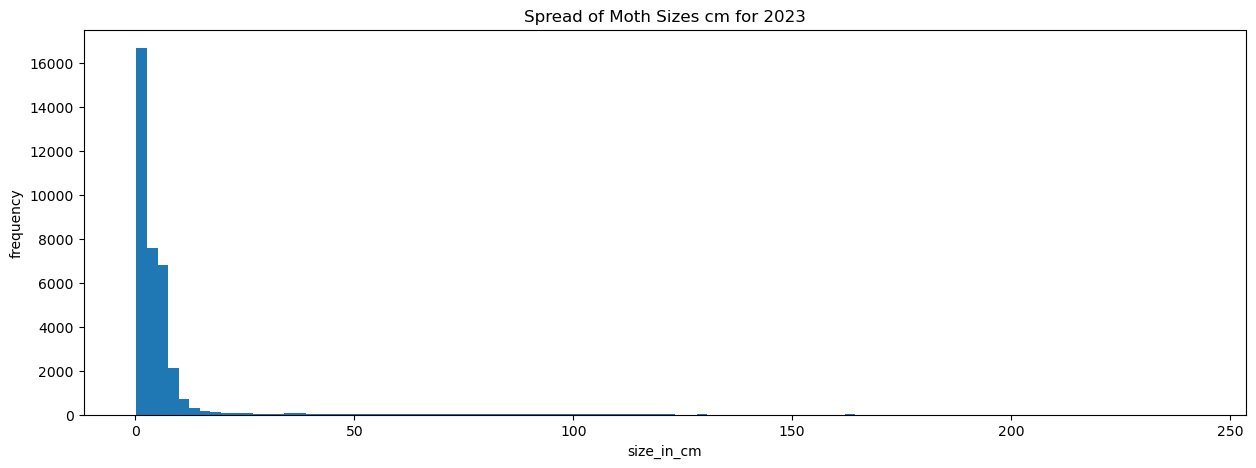

In [27]:
# histogram for the entire expanse

def build_hist(series):
    data = np.array(series)
    plt.figure(figsize=(15,5))

    plt.hist(data, bins=100)
    plt.xlabel("size_in_cm")
    plt.ylabel("frequency")
    plt.title("Spread of Moth Sizes cm for 2023")
    return

build_hist(ws1pred_df["size_in_cm"])

Text(0.5, 1.0, 'Distribution for Insect Sizes')

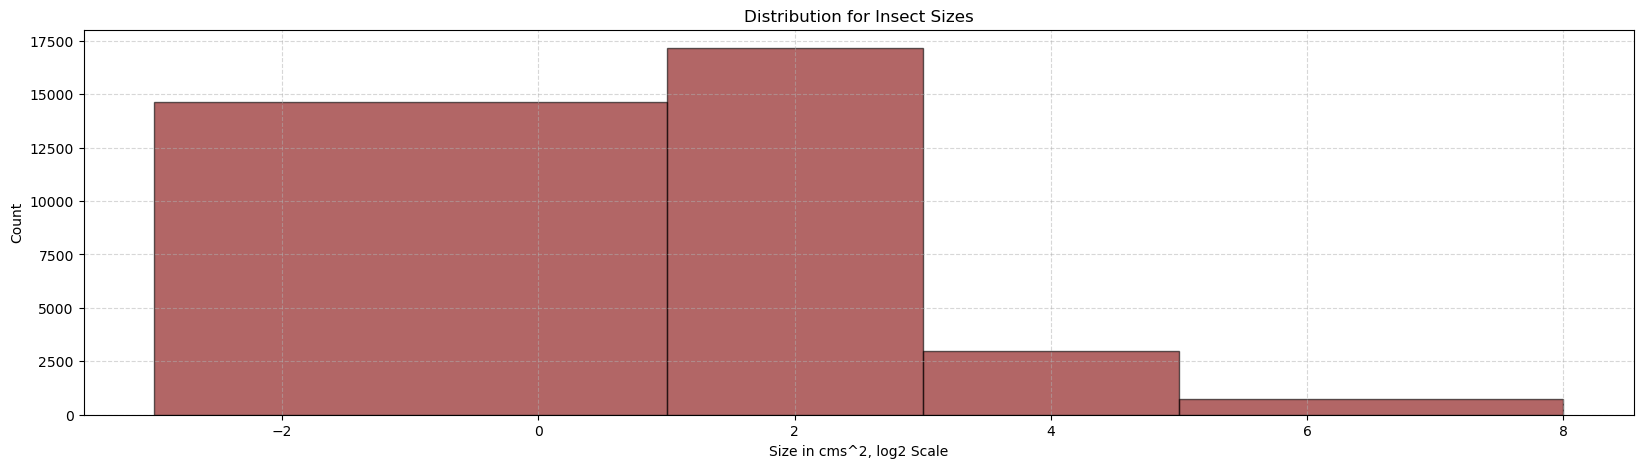

In [30]:
plt.figure(figsize=(20,5))
data = np.array(ws1pred_df["log2(size)"])
# binedges = get_bin_edges(ws1pred_df["log2(size)"], 4)
# print(binedges)
binedges = [-3,1,3,5,8]

plt.hist(data,bins = binedges, edgecolor="black", color="maroon", alpha=.6)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xlabel("Size in cms^2, log2 Scale")
plt.ylabel("Count")
plt.title("Distribution for Insect Sizes")

In [31]:
binedges = [-3,1,3,5,8]

ws1pred_df["size_bin"] = pd.cut(ws1pred_df['log2(size)'], bins=binedges, right=True, include_lowest=True)
new_order =  ["filePath",'night',"log2(size)","size_bin",'size_in_cm','hour',"hhmm","timebin",'Date', 'time_manifest', 'Station', 'Photo_Name', 'X_Min', 'Y_Min', 'X_Max',
       'Y_Max', 'Confidence', "log10(size)", 'diff_x', 'diff_y', 'diff_x_in_cm', 'diff_y_in_cm', "Time", 'fileName.orig']
ws1pred_df = ws1pred_df[new_order]
display(ws1pred_df.head(15))

,filePath,night,log2(size),size_bin,size_in_cm,hour,hhmm,timebin,Date,time_manifest,...,X_Max,Y_Max,Confidence,log10(size),diff_x,diff_y,diff_x_in_cm,diff_y_in_cm,Time,fileName.orig
25892,2023/2023_WS1_0611_2245_WSCT3006.JPG,6112023,0.509155,"(-3.001, 1.0]",1.423216,0.8,2245,22,2023-06-11,22:45:02,...,2375.461426,2022.009521,0.499681,0.153271,91.807373,88.265747,1.253291,1.135583,22:45:01,WSCT3006.JPG
29549,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.469472,"(1.0, 3.0]",5.538411,4.5,230,2,2023-06-12,2:30:02,...,2834.101563,693.610168,0.596519,0.743385,195.328613,161.442627,2.666493,2.077040,2:30:00,WSCT3051.JPG
29548,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,3.080219,"(3.0, 5.0]",8.457429,4.5,230,2,2023-06-12,2:30:02,...,5505.104492,1494.523193,0.599662,0.927238,275.994141,174.476685,3.767683,2.244729,2:30:00,WSCT3051.JPG
29547,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,3.002963,"(3.0, 5.0]",8.016447,4.5,230,2,2023-06-12,2:30:02,...,3321.279297,981.184937,0.601644,0.903982,219.028320,208.391785,2.990025,2.681064,2:30:00,WSCT3051.JPG
29546,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.591962,"(1.0, 3.0]",6.029180,4.5,230,2,2023-06-12,2:30:02,...,5520.278320,2576.307373,0.602260,0.780258,232.555176,147.615234,3.174684,1.899143,2:30:00,WSCT3051.JPG
29545,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.681323,"(1.0, 3.0]",6.414437,4.5,230,2,2023-06-12,2:30:02,...,5480.913086,2803.433594,0.608693,0.807159,244.750000,149.222656,3.341160,1.919824,2:30:00,WSCT3051.JPG
29544,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.683207,"(1.0, 3.0]",6.422819,4.5,230,2,2023-06-12,2:30:02,...,2695.400635,2022.190674,0.608769,0.807726,257.509522,142.014038,3.515344,1.827081,2:30:00,WSCT3051.JPG
29543,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.498359,"(1.0, 3.0]",5.650423,4.5,230,2,2023-06-12,2:30:02,...,4093.436523,1013.656372,0.609511,0.752081,209.363037,153.666748,2.858081,1.976999,2:30:00,WSCT3051.JPG
29542,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.336580,"(1.0, 3.0]",5.051039,4.5,230,2,2023-06-12,2:30:02,...,3900.016113,2272.145752,0.609520,0.703381,213.218750,134.882080,2.910716,1.735325,2:30:00,WSCT3051.JPG
29541,2023/2023_WS1_0611_0230_WSCT3051.JPG,6112023,2.971610,"(1.0, 3.0]",7.844109,4.5,230,2,2023-06-12,2:30:02,...,972.272766,874.928589,0.612828,0.894544,243.960510,183.072449,3.330382,2.355318,2:30:00,WSCT3051.JPG


In [32]:
sizedist_photo = (pd.get_dummies(ws1pred_df["size_bin"], prefix="count")
         .join(ws1pred_df[["fileName.orig", "night", "Time", "hour", "hhmm"]])
         .groupby(["fileName.orig", "night", "Time", "hour", "hhmm"], as_index=False)
         .sum())

# save if you want
display(sizedist_photo.head(20))

,fileName.orig,night,Time,hour,hhmm,"count_(-3.001, 1.0]","count_(1.0, 3.0]","count_(3.0, 5.0]","count_(5.0, 8.0]"
0,WSCT2997.JPG,6112023,22:00:00,0.0,2200,24,25,1,0
1,WSCT2998.JPG,6112023,22:05:01,0.1,2205,30,25,5,0
2,WSCT2999.JPG,6112023,22:10:01,0.2,2210,30,39,3,0
3,WSCT3000.JPG,6112023,22:15:01,0.3,2215,26,39,7,0
4,WSCT3001.JPG,6112023,22:20:01,0.3,2220,28,48,8,0
5,WSCT3002.JPG,6112023,22:25:01,0.4,2225,24,51,9,0
6,WSCT3003.JPG,6112023,22:30:01,0.5,2230,27,55,16,0
7,WSCT3004.JPG,6112023,22:35:01,0.6,2235,30,66,13,0
8,WSCT3005.JPG,6112023,22:40:01,0.7,2240,22,78,16,0
9,WSCT3006.JPG,6112023,22:45:01,0.8,2245,22,80,14,0


In [36]:
bin_cols = [c for c in sizedist_photo.columns if c.startswith("count_")]
by_night_max = (
    sizedist_photo.groupby("night", as_index=False)[bin_cols]
       .max()
)
cols =["count_(-3.001, 1.0]","count_(1.0, 3.0]", "count_(3.0, 5.0]", "count_(5.0, 8.0]"]
by_night_max["total"] = by_night_max[cols].sum(axis=1)
by_night_max["night_date"] = pd.to_datetime(by_night_max["night"].astype(str), format="%m%d%Y", errors="coerce")

display(by_night_max.head(10))

,night,"count_(-3.001, 1.0]","count_(1.0, 3.0]","count_(3.0, 5.0]","count_(5.0, 8.0]",total,night_date
0,6112023,36,101,23,7,167,2023-06-11
1,6202023,27,63,22,12,124,2023-06-20
2,6282023,21,30,15,10,76,2023-06-28
3,7052023,36,24,8,3,71,2023-07-05
4,7122023,24,33,8,1,66,2023-07-12
5,7202023,18,18,4,0,40,2023-07-20
6,7242023,11,13,3,3,30,2023-07-24
7,8022023,15,8,3,0,26,2023-08-02
8,8162023,25,34,3,0,62,2023-08-16
9,8192023,40,17,5,0,62,2023-08-19


In [46]:
by_night_max["bm_(-3.001, 1.0]"] = by_night_max["count_(-3.001, 1.0]"]*3
by_night_max["bm_(1.0, 3.0]"] = by_night_max["count_(1.0, 3.0]"]*57
by_night_max["bm_(3.0, 5.0]"] = by_night_max["count_(3.0, 5.0]"]*279
by_night_max["bm_(5.0, 8.0]"] = by_night_max["count_(5.0, 8.0]"]*418
cols_bm =["bm_(-3.001, 1.0]","bm_(1.0, 3.0]", "bm_(3.0, 5.0]", "bm_(5.0, 8.0]"]
by_night_max["bm_total"] = by_night_max[cols_bm].sum(axis=1)
display(by_night_max)

,night,"count_(-3.001, 1.0]","count_(1.0, 3.0]","count_(3.0, 5.0]","count_(5.0, 8.0]",total,night_date,"bm_(-3.001, 1.0]","bm_(1.0, 3.0]","bm_(3.0, 5.0]","bm_(5.0, 8.0]",bm_total
0,6112023,36,101,23,7,167,2023-06-11,108,5757,6417,2926,15208
1,6202023,27,63,22,12,124,2023-06-20,81,3591,6138,5016,14826
2,6282023,21,30,15,10,76,2023-06-28,63,1710,4185,4180,10138
3,7052023,36,24,8,3,71,2023-07-05,108,1368,2232,1254,4962
4,7122023,24,33,8,1,66,2023-07-12,72,1881,2232,418,4603
5,7202023,18,18,4,0,40,2023-07-20,54,1026,1116,0,2196
6,7242023,11,13,3,3,30,2023-07-24,33,741,837,1254,2865
7,8022023,15,8,3,0,26,2023-08-02,45,456,837,0,1338
8,8162023,25,34,3,0,62,2023-08-16,75,1938,837,0,2850
9,8192023,40,17,5,0,62,2023-08-19,120,969,1395,0,2484


In [39]:
by_night_max

,night,"count_(-3.001, 1.0]","count_(1.0, 3.0]","count_(3.0, 5.0]","count_(5.0, 8.0]",total,night_date,"bm_(-3.001, 1.0]","bm_(1.0, 3.0]","bm_(3.0, 5.0]","bm_(5.0, 8.0]"
0,6112023,36,101,23,7,167,2023-06-11,108,5757,6417,2926
1,6202023,27,63,22,12,124,2023-06-20,81,3591,6138,5016
2,6282023,21,30,15,10,76,2023-06-28,63,1710,4185,4180
3,7052023,36,24,8,3,71,2023-07-05,108,1368,2232,1254
4,7122023,24,33,8,1,66,2023-07-12,72,1881,2232,418
5,7202023,18,18,4,0,40,2023-07-20,54,1026,1116,0
6,7242023,11,13,3,3,30,2023-07-24,33,741,837,1254
7,8022023,15,8,3,0,26,2023-08-02,45,456,837,0
8,8162023,25,34,3,0,62,2023-08-16,75,1938,837,0
9,8192023,40,17,5,0,62,2023-08-19,120,969,1395,0


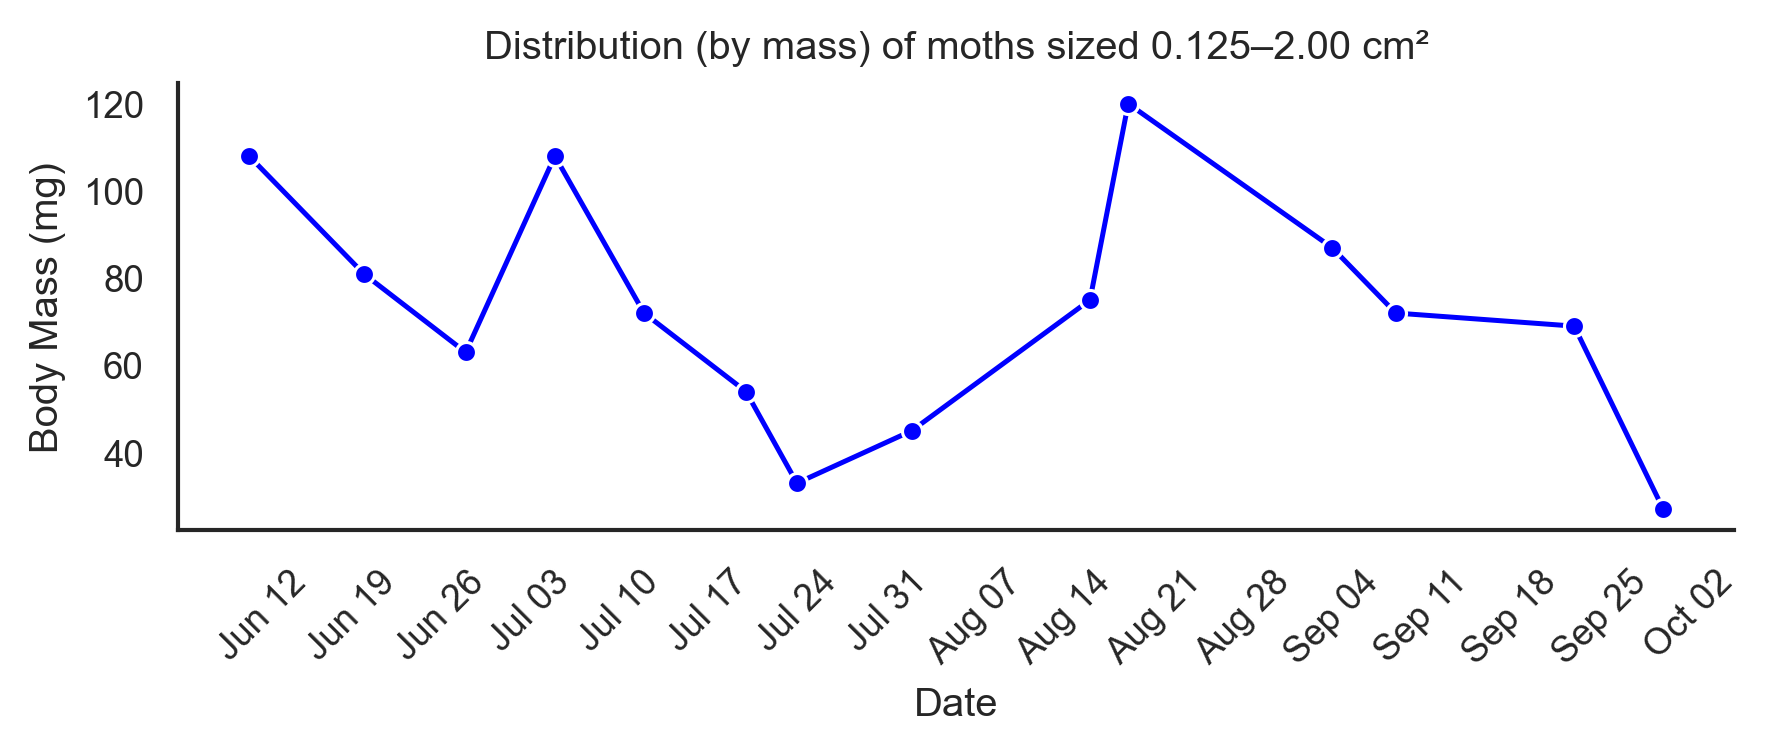

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# ----- config your columns -----
xcol = "night_date"                  # datetime column
ycol = "bm_(-3.001, 1.0]"        # your series

# ----- style: blank background -----
sns.set_theme(style="white", context="paper",
              rc={"axes.spines.top": False, "axes.spines.right": False})

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()

# endpoints
x0, y0 = x[0], y[0]
x1, y1 = x[-1], y[-1]

fig, ax = plt.subplots(figsize=(6.0, 2.6), dpi=300)

# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="blue", ax=ax)

# start→end connector: plain semi-transparent line (no arrow, no label)
# ax.plot([x0, x1], [y0, y1],
#         color="tab:blue", linewidth=2, alpha=0.50, zorder=1)  # tweak alpha (0–1)

# axes / ticks
ax.set_xlabel("Date"); ax.set_ylabel("Body Mass (mg)")
ax.set_title("Distribution (by mass) of moths sized 0.125–2.00 cm\u00b2")

# ticks each week on Monday
locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
formatter = mdates.DateFormatter('%b %d')   # e.g., "Jun 17"
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# start/end on week boundaries (optional)
# ax.set_xlim(d[xcol].min().normalize() - 1, d[xcol].max().normalize()+1)

# ax.set_ylim(0, 120)
# rotate labels if crowded
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)   # or 45


ax.grid(False)

plt.tight_layout()
plt.show()


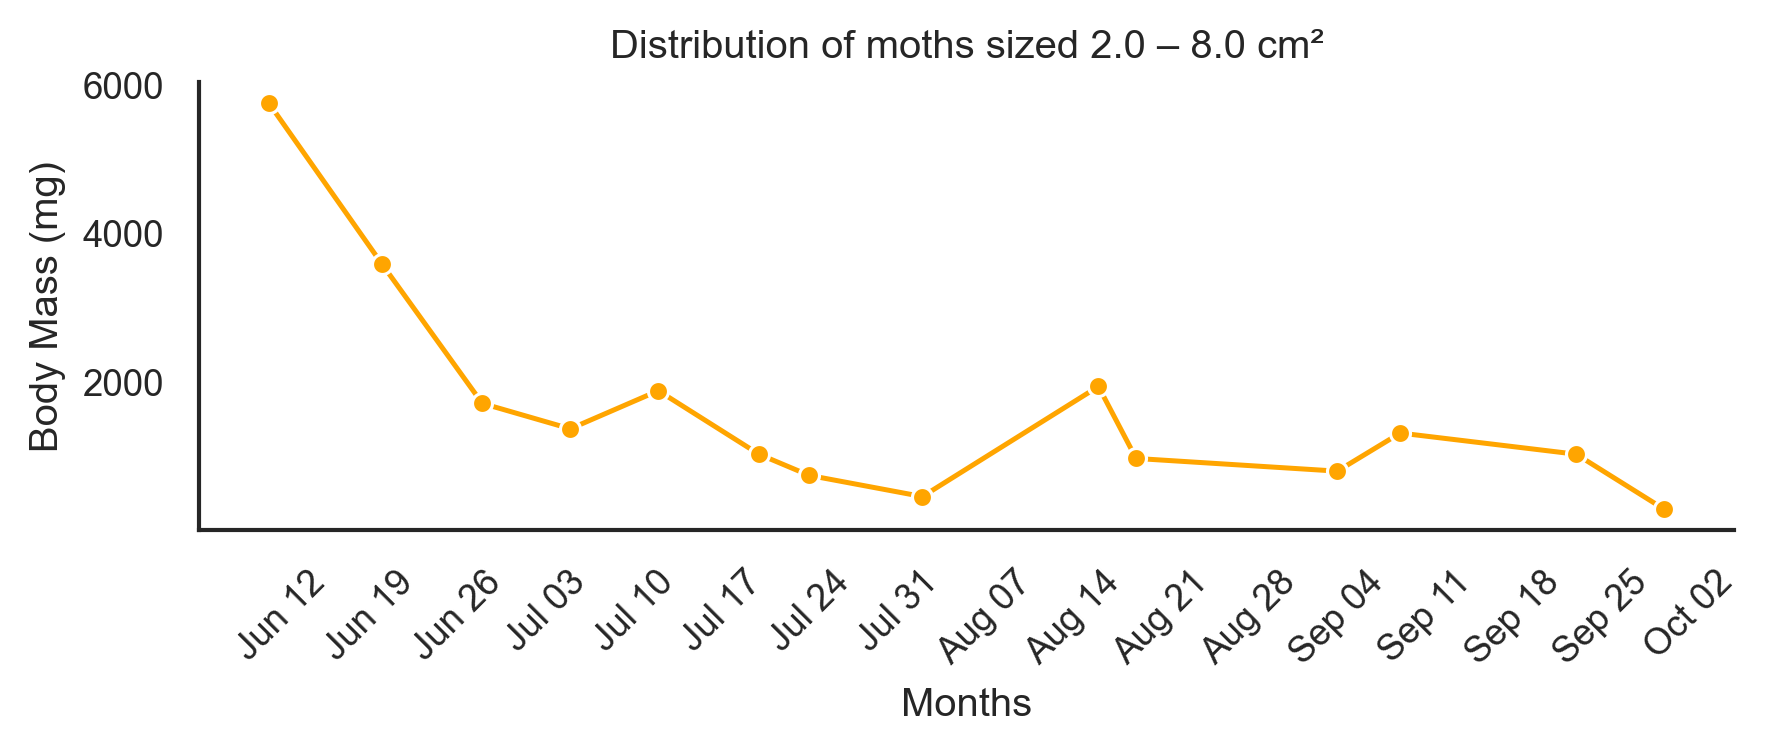

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# ----- config your columns -----
xcol = "night_date"                  # datetime column
ycol = "bm_(1.0, 3.0]"        # your series

# ----- style: blank background -----
sns.set_theme(style="white", context="paper",
              rc={"axes.spines.top": False, "axes.spines.right": False})

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()

# endpoints
x0, y0 = x[0], y[0]
x1, y1 = x[-1], y[-1]

fig, ax = plt.subplots(figsize=(6.0, 2.6), dpi=300)

# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="orange", ax=ax)

# start→end connector: plain semi-transparent line (no arrow, no label)
# ax.plot([x0, x1], [y0, y1],
#         color="tab:blue", linewidth=2, alpha=0.50, zorder=1)  # tweak alpha (0–1)

# axes / ticks
ax.set_xlabel("Months"); ax.set_ylabel("Body Mass (mg)")
ax.set_title("Distribution of moths sized 2.0 – 8.0 cm\u00b2")

# ticks each week on Monday
locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
formatter = mdates.DateFormatter('%b %d')   # e.g., "Jun 17"
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# start/end on week boundaries (optional)
# ax.set_xlim(d[xcol].min().normalize() - 1, d[xcol].max().normalize()+1)
# ax.set_ylim(0, 120)

# rotate labels if crowded
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)   # or 45

plt.tight_layout()
plt.show()

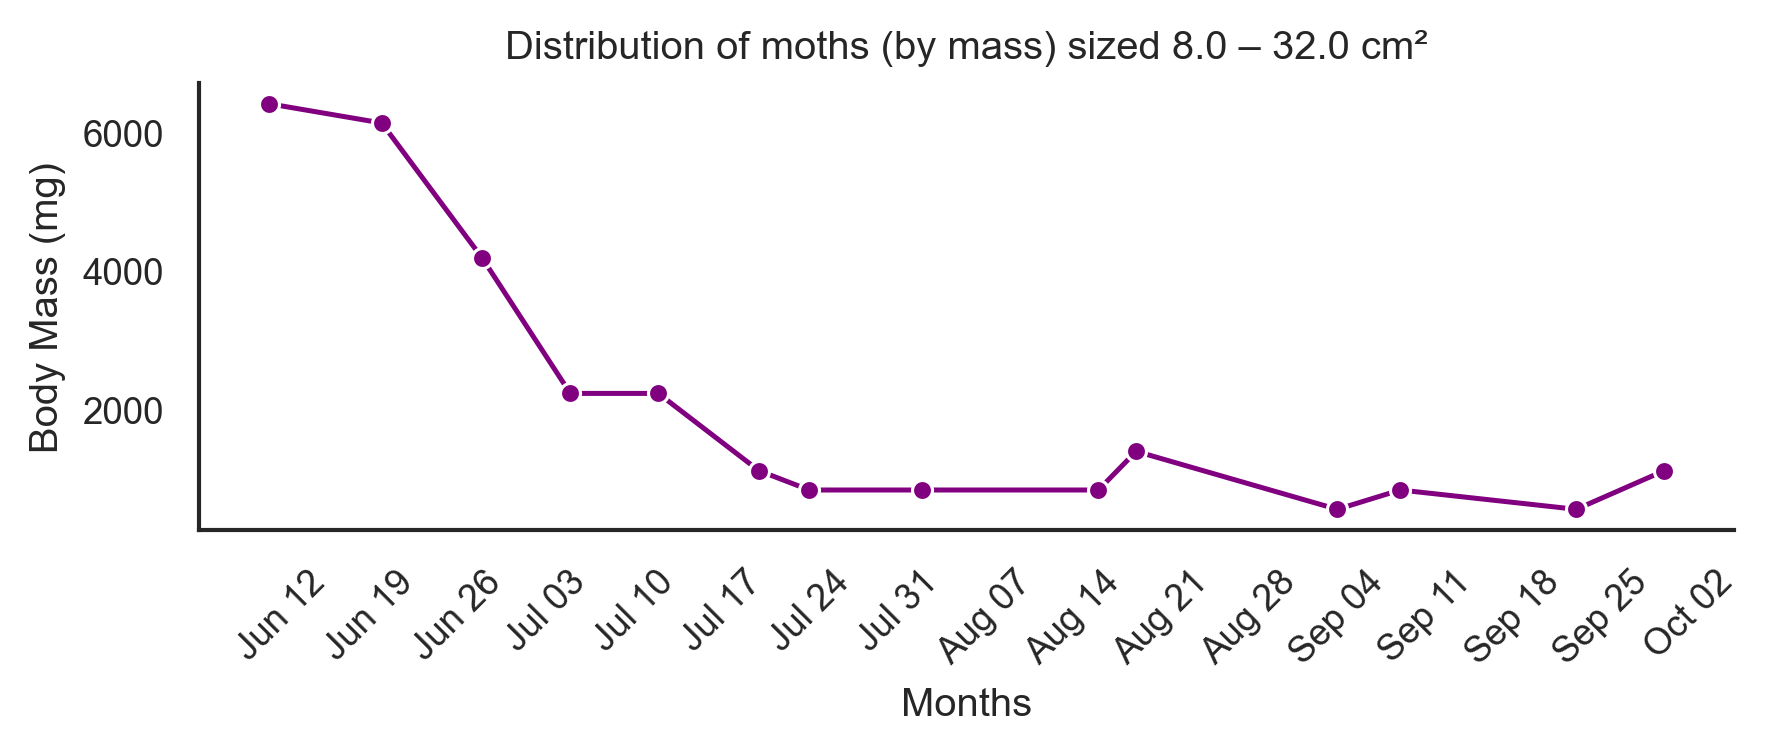

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# ----- config your columns -----
xcol = "night_date"                  # datetime column
ycol = "bm_(3.0, 5.0]"        # your series

# ----- style: blank background -----
sns.set_theme(style="white", context="paper",
              rc={"axes.spines.top": False, "axes.spines.right": False})

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()

# endpoints
x0, y0 = x[0], y[0]
x1, y1 = x[-1], y[-1]

fig, ax = plt.subplots(figsize=(6.0, 2.6), dpi=300)

# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="purple", ax=ax)

# start→end connector: plain semi-transparent line (no arrow, no label)
# ax.plot([x0, x1], [y0, y1],
#         color="tab:blue", linewidth=2, alpha=0.50, zorder=1)  # tweak alpha (0–1)

# axes / ticks
ax.set_xlabel("Months"); ax.set_ylabel("Body Mass (mg)")
ax.set_title("Distribution of moths (by mass) sized 8.0 – 32.0 cm\u00b2")

# ticks each week on Monday
locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
formatter = mdates.DateFormatter('%b %d')   # e.g., "Jun 17"
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# start/end on week boundaries (optional)
# ax.set_xlim(d[xcol].min().normalize() - 1, d[xcol].max().normalize()+1)
# ax.set_ylim(0, 120)

# rotate labels if crowded
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)   # or 45

plt.tight_layout()
plt.show()


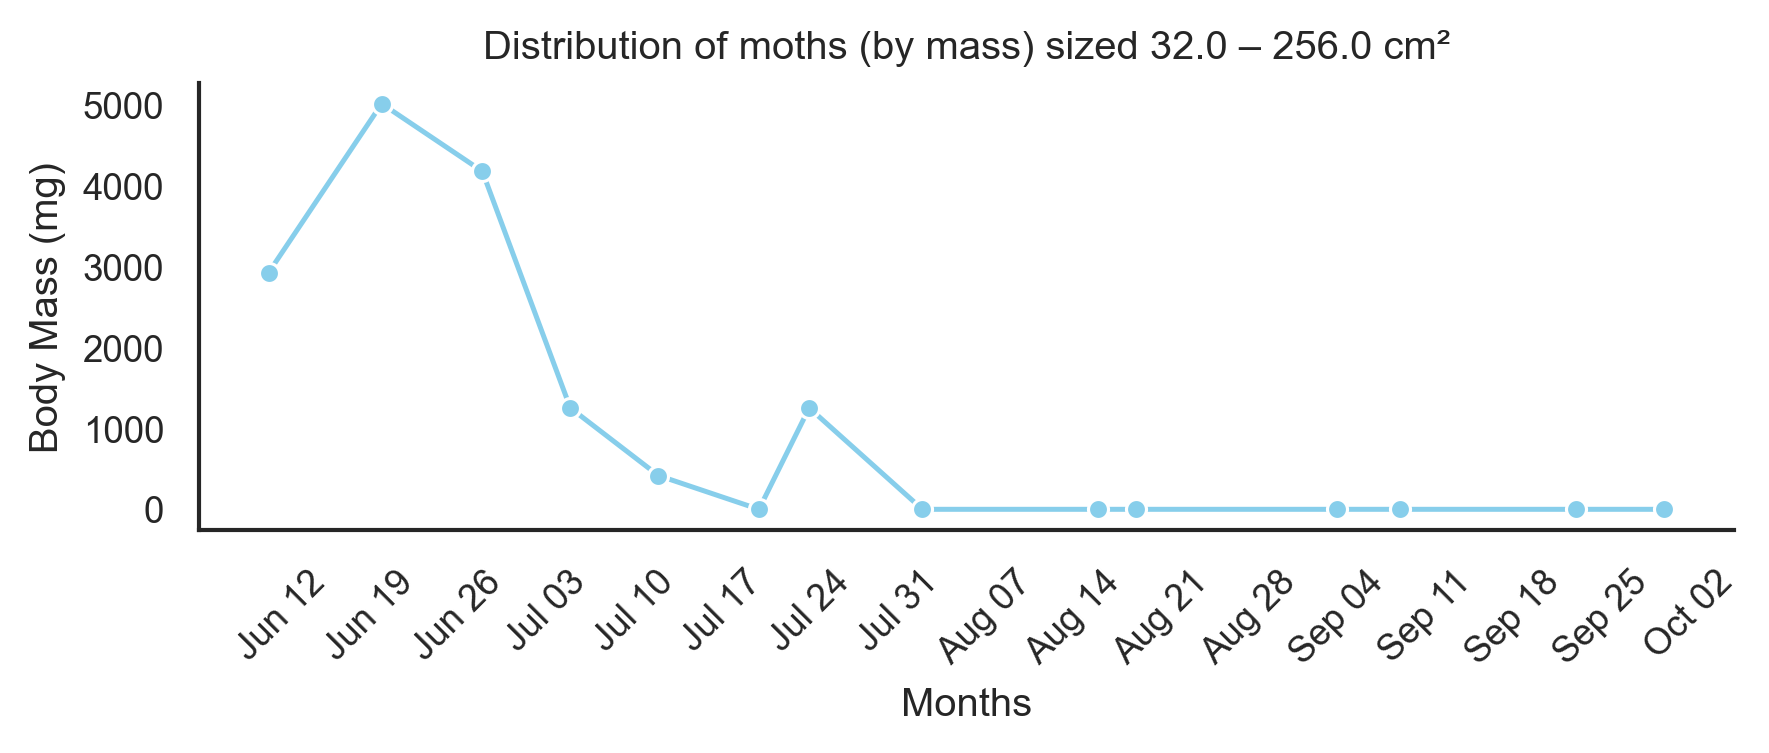

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# ----- config your columns -----
xcol = "night_date"                  # datetime column
ycol = "bm_(5.0, 8.0]"        # your series

# ----- style: blank background -----
sns.set_theme(style="white", context="paper",
              rc={"axes.spines.top": False, "axes.spines.right": False})

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()

# endpoints
x0, y0 = x[0], y[0]
x1, y1 = x[-1], y[-1]

fig, ax = plt.subplots(figsize=(6.0, 2.6), dpi=300)

# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color = "skyblue", ax=ax)

# start→end connector: plain semi-transparent line (no arrow, no label)
# ax.plot([x0, x1], [y0, y1],
#         color="tab:blue", linewidth=2, alpha=0.50, zorder=1)  # tweak alpha (0–1)

# axes / ticks
ax.set_xlabel("Months"); ax.set_ylabel("Body Mass (mg)")
ax.set_title("Distribution of moths (by mass) sized 32.0 – 256.0 cm\u00b2")

# ticks each week on Monday
locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
formatter = mdates.DateFormatter('%b %d')   # e.g., "Jun 17"
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# start/end on week boundaries (optional)
# ax.set_xlim(d[xcol].min().normalize() - 1, d[xcol].max().normalize()+1)
# ax.set_ylim(0, 120)

# rotate labels if crowded
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)   # or 45


plt.tight_layout()
plt.show()


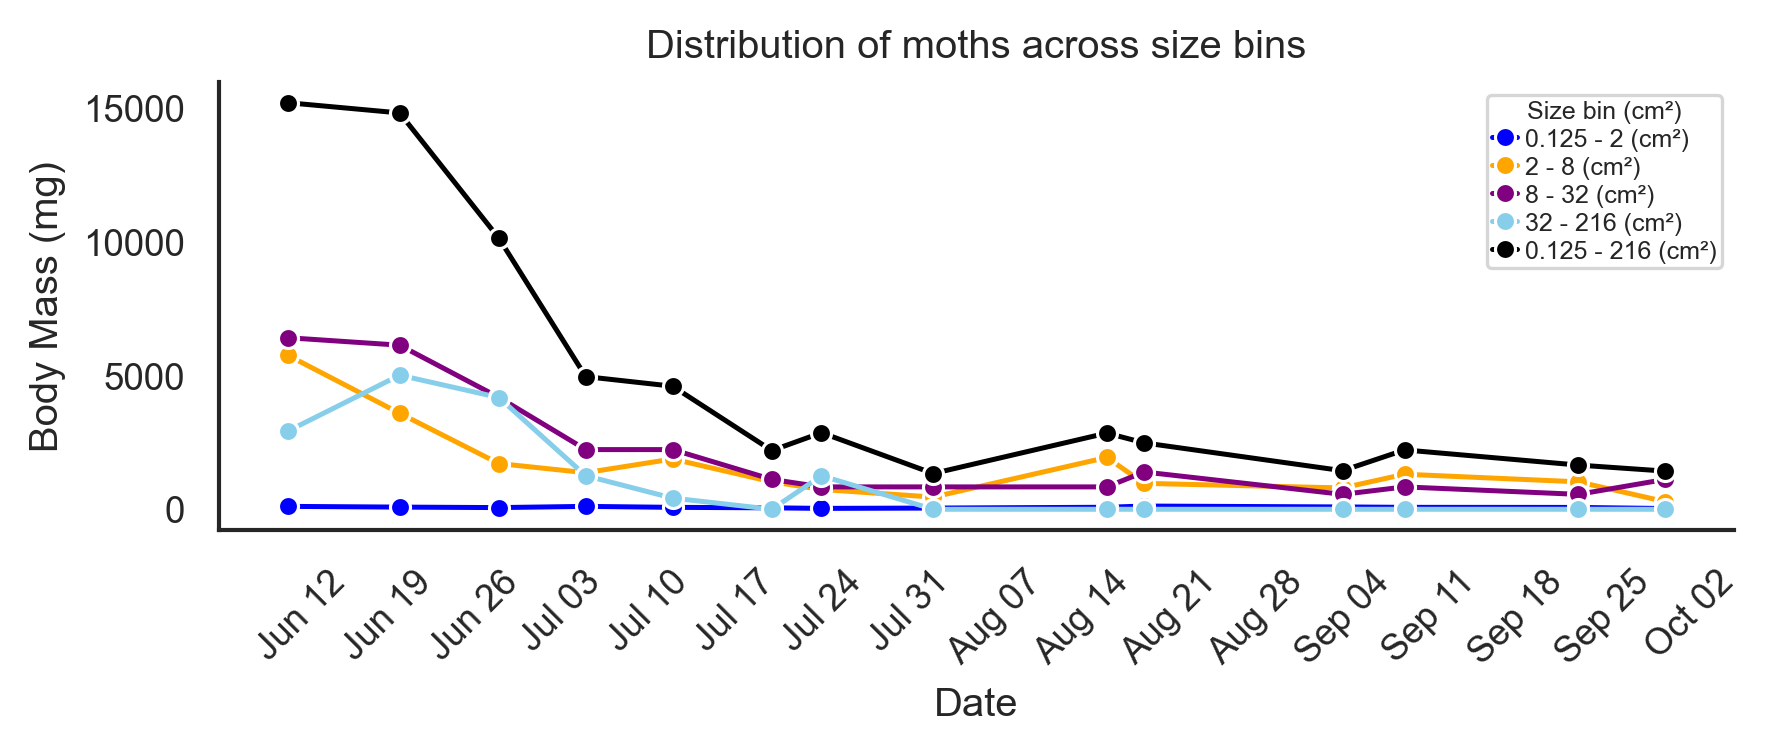

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np



# ----- style: blank background -----
sns.set_theme(style="white", context="paper",
              rc={"axes.spines.top": False, "axes.spines.right": False})

fig, ax = plt.subplots(figsize=(6.0, 2.6), dpi=300)

# ----- config your columns -----
xcol = "night_date"                  # datetime column
ycol = "bm_(-3.001, 1.0]"        # your series

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()
# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="blue", ax=ax, label = "0.125 - 2 (cm²)")

xcol = "night_date"                  # datetime column
ycol = "bm_(1.0, 3.0]"        # your series

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()
# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="orange", ax=ax, label = "2 - 8 (cm²)")

xcol = "night_date"                  # datetime column
ycol = "bm_(3.0, 5.0]"        # your series

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()
# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="purple", ax=ax, label = "8 - 32 (cm²)")

xcol = "night_date"                  # datetime column
ycol = "bm_(5.0, 8.0]"        # your series

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()
# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="skyblue", ax=ax, label = "32 - 216 (cm²)")

xcol = "night_date"                  # datetime column
ycol = "bm_total"        # your series

# sort & drop NaNs
d = by_night_max[[xcol, ycol]].dropna().sort_values(xcol).copy()
if d.empty:
    raise ValueError("No data to plot after dropping NaNs.")
x = d[xcol].to_numpy()
y = d[ycol].to_numpy()
# main line with markers (black dashed)
sns.lineplot(data=d, x=xcol, y=ycol, marker="o", dashes=True, color="black", ax=ax, label = "0.125 - 216 (cm²)")

# axes / ticks
ax.set_xlabel("Date"); ax.set_ylabel("Body Mass (mg)")
ax.set_title("Distribution of moths across size bins")

# ticks each week on Monday
locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
formatter = mdates.DateFormatter('%b %d')   # e.g., "Jun 17"
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# start/end on week boundaries (optional)
# ax.set_xlim(d[xcol].min().normalize() - 1, d[xcol].max().normalize()+1)

# ax.set_ylim(0, 120)
# rotate labels if crowded
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)   # or 45


ax.grid(False)

desired_order = [ "0.125 - 2 (cm²)", "2 - 8 (cm²)", "8 - 32 (cm²)", "32 - 216 (cm²)", "0.125 - 216 (cm²)"]
handles, labels = ax.get_legend_handles_labels()
order = [labels.index(l) for l in desired_order if l in labels]

ax.legend([handles[i] for i in order],
          [labels[i]  for i in order],
          title="Size bin (cm²)",
          frameon=True, ncol=1, loc="upper right", fontsize=6, title_fontsize=6,
                handlelength=1.0, handletextpad=0.3,
                borderpad=0.2, labelspacing=0.2, columnspacing=0.6,)

plt.tight_layout()
plt.show()
